# K-Means Clustering

In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
#X = np.array([[1, 2], [2, 1], [3, 3],
#              [8, 1.5], [9, 2], [10, 0]])
X = np.array([[1,1],[1.5,2],[1.8,1.5],[2.25,1.2],[3,1]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


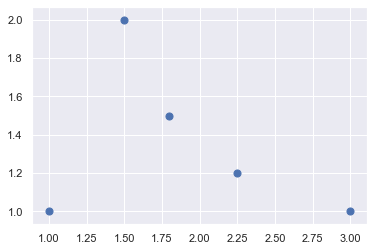

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
plt.scatter(X[:, 0], X[:, 1], s=50);

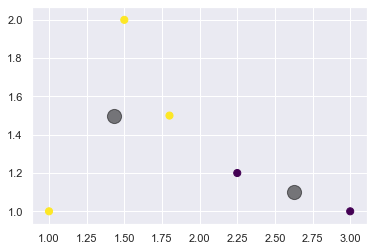

In [3]:
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# K-Mean from scratch

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


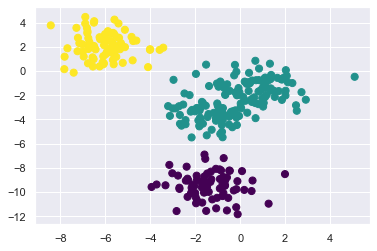

In [4]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    a = rng.permutation(X.shape[0])
    i = a[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers) #Compute minimum distances between one point and a set of points.
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=1.0, random_state=2)
centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# silhouette analysis

In [5]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5523170626155283
For n_clusters = 3 The average silhouette_score is : 0.6724486897816884
For n_clusters = 4 The average silhouette_score is : 0.6007000059786524
For n_clusters = 5 The average silhouette_score is : 0.541299386398218
For n_clusters = 6 The average silhouette_score is : 0.44399176342237157
For n_clusters = 7 The average silhouette_score is : 0.3471211901097831
For n_clusters = 8 The average silhouette_score is : 0.32676355907735866
For n_clusters = 9 The average silhouette_score is : 0.33402225669778546
For n_clusters = 10 The average silhouette_score is : 0.3413608870095466


# k-means for color compression

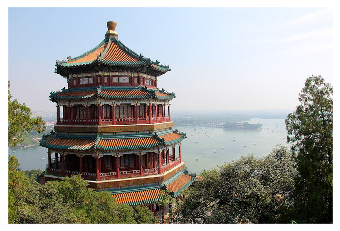

In [6]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [7]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [8]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

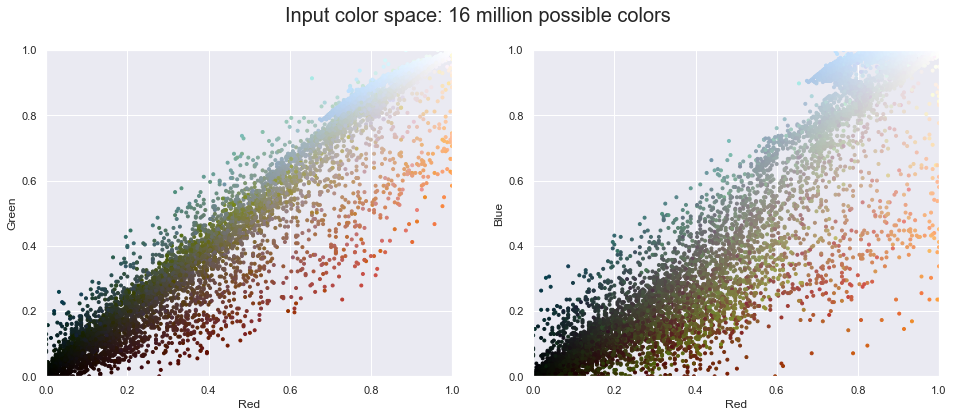

In [9]:
plot_pixels(data, title='Input color space: 16 million possible colors')

(273280, 3)


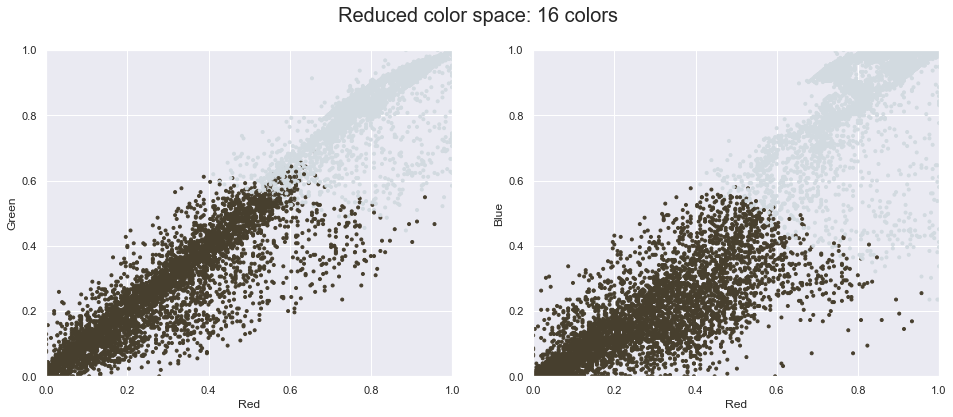

In [14]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
print(new_colors.shape)

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

#https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf

(427, 640, 3)


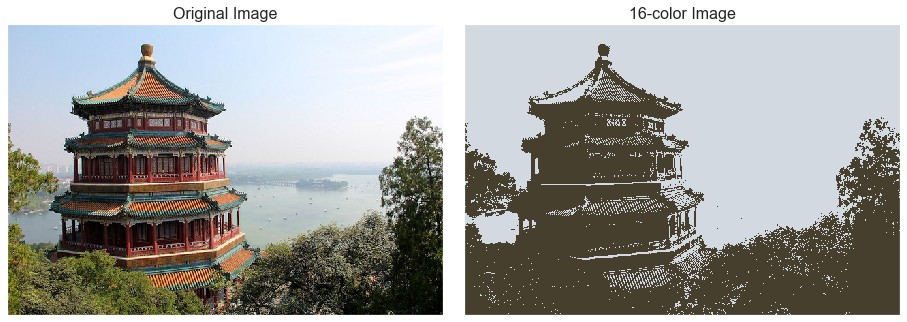

In [15]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);
print(china_recolored.shape)